For complete details, see figure 12.1 in Trefethen and Bau's Numerical Linear Algebra

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# set image parameters
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

In [6]:
roots = np.arange(1,21)
coefs = np.polynomial.polynomial.polyfromroots(roots)[::-1]

In [43]:
nSamps = int(1E4)
Color = []
X = np.zeros((len(roots),nSamps))
Y = np.zeros((len(roots),nSamps))

Samples = []
for kk in range(nSamps):
    perturbed_coefs = coefs*(np.ones(len(coefs))+1E-10*np.random.normal(size=len(coefs)))
    Color.append(np.linalg.norm(perturbed_coefs-coefs))
    
    perturbed_roots = np.roots(perturbed_coefs)
    
    X[:,kk]=np.array(np.real(perturbed_roots))
    Y[:,kk]=np.array(np.imag(perturbed_roots))

Color = Color-np.min(Color)
Color = Color/np.max(Color)

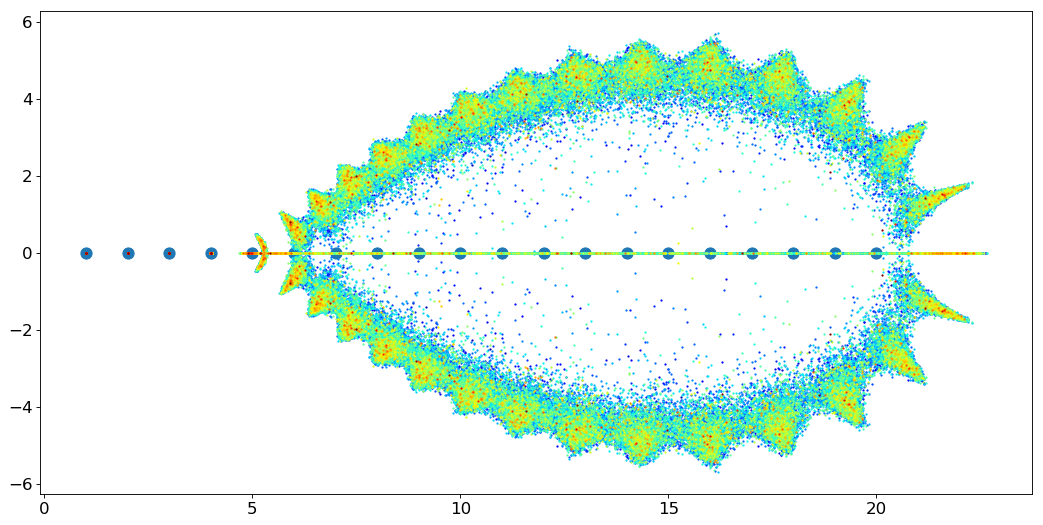

In [48]:
plt.scatter(roots,np.zeros_like(roots),s=100)
Index = np.argsort(Color)
for kk in range(nSamps):
    plt.scatter(X[:,Index[kk]],Y[:,Index[kk]],color = cm.jet(Color[Index[kk]]),s=1)
plt.show()